In [4]:
import pandas as pd
%matplotlib inline

In [2]:
train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


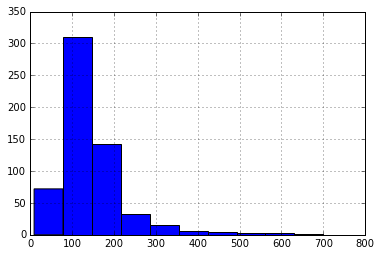

In [5]:
train.LoanAmount.hist() # distribution of loan amount

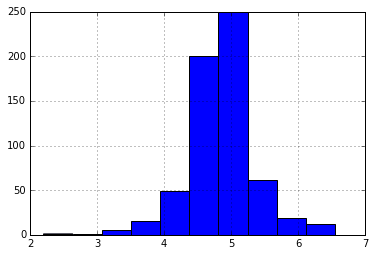

In [21]:
import numpy as np
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train.LoanAmount_log.hist()

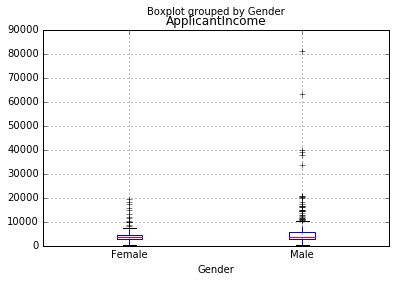

In [6]:
train.boxplot(column = 'ApplicantIncome', by = 'Gender') # distribution by gender

In [7]:
pd.crosstab(train['Gender'], train['Loan_Status'], margins = True) # Check whether Gender is affecting loan_status

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [10]:
train.Loan_Status.value_counts() # Loan status in absolute numbers

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train.LoanAmount.isnull().sum() # to count no of observations that are missing in Loan amount

22

In [15]:
train.LoanAmount.isnull().sum() > 0 # whether loan amount has missing values or not?

True

In [16]:
train.isnull().sum() # check how many or which variables have missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True) # filling missing values with mean
train['LoanAmount'].fillna(168, inplace = True) # if 168 needs to filled for missings

In [18]:
train['Self_Employed'].value_counts() # 'No' has highest frequency than 'Yes'

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
train['Self_Employed'].fillna('No', inplace = True)

In [20]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Model building

In [28]:
from sklearn.preprocessing import LabelEncoder

In [30]:
number = LabelEncoder() # intantiate
train['Gender'] = number.fit_transform(train['Gender'].astype('str'))

In [35]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = 